In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
discrete_feature = [feature for feature in df.columns if len(df[feature].unique())<25]
continuous_feature = [feature for feature in df.columns if feature not in discrete_feature]

In [6]:
print("Numerical Feature Count {}".format(len(numerical_feature)))
print("Categorical Features Count {}".format(len(categorical_feature)))
print("Discrete Features Count {}".format(len(discrete_feature)))
print("Continuous Features Count {}".format(len(continuous_feature)))


Numerical Feature Count 5
Categorical Features Count 4
Discrete Features Count 5
Continuous Features Count 4


In [7]:
print("numerical_feature :{}".format(numerical_feature))
print("categorical_feature :{}".format(categorical_feature))
print("Discrete_feature :{}".format(discrete_feature))
print("continuous_feature :{}".format(continuous_feature))

numerical_feature :['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
categorical_feature :['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
Discrete_feature :['Year', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
continuous_feature :['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven']


In [8]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [9]:
#to check null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
fdf = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [13]:
#fdf.head()

In [14]:
fdf['Current_Year']=2020

In [15]:
fdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [16]:
fdf["No_Of_Year"] = fdf['Current_Year']-fdf['Year']

In [17]:
fdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Of_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [18]:
fdf.drop(['Year'],axis = 1, inplace =True)

In [19]:
fdf.drop(['Current_Year'],axis = 1, inplace =True)

In [20]:
fdf.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [21]:
fdf=pd.get_dummies(fdf,drop_first=True)

In [22]:
fdf.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


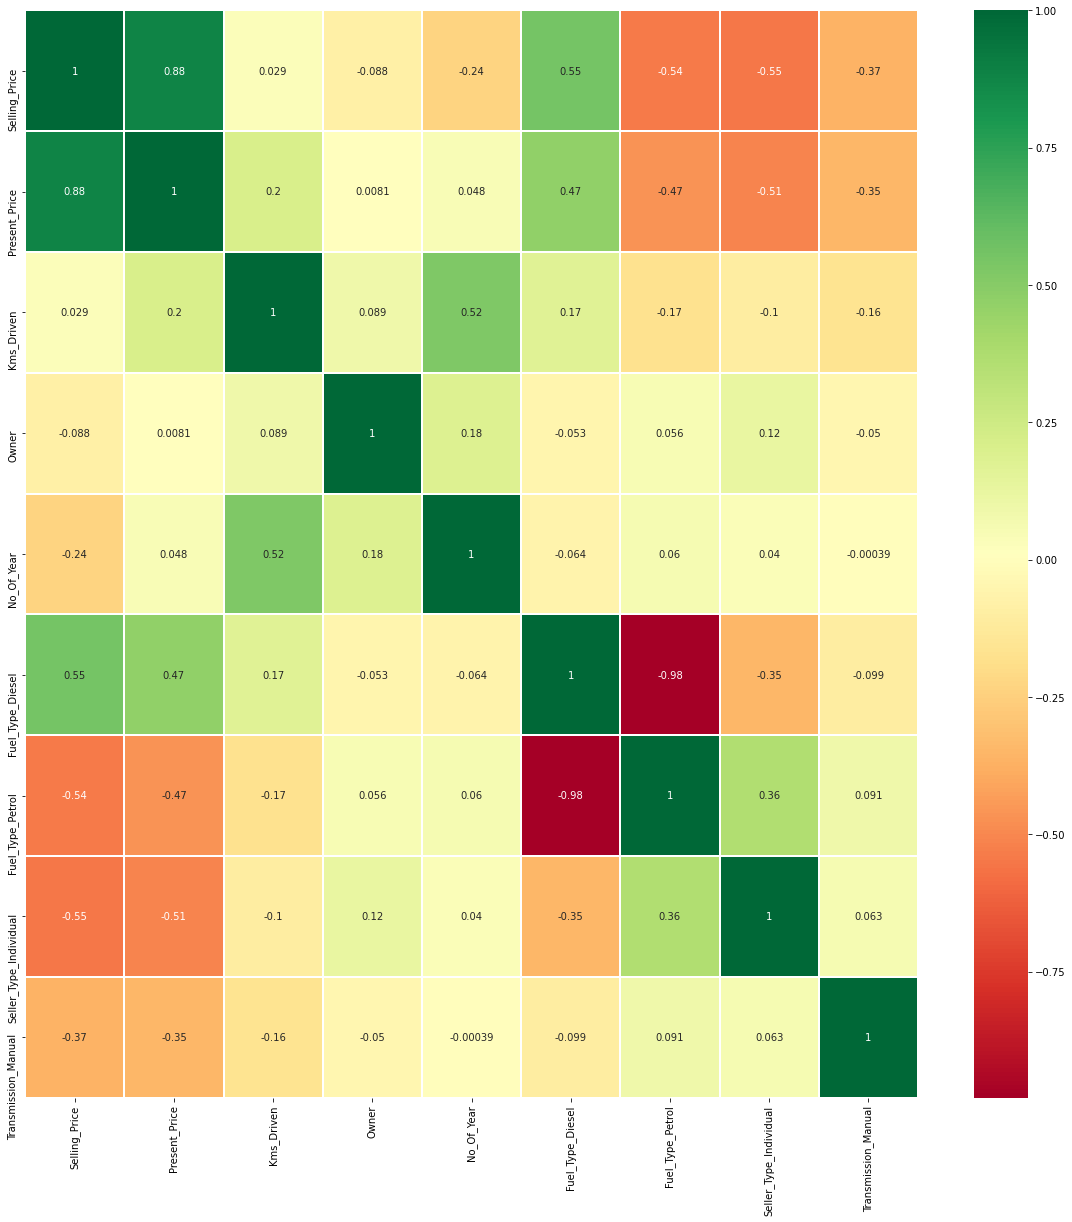

In [23]:
corrmat = fdf.corr(method = "spearman")
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(fdf[top_corr_feature].corr(), annot = True, cmap ="RdYlGn", linewidths = 0.1)
 

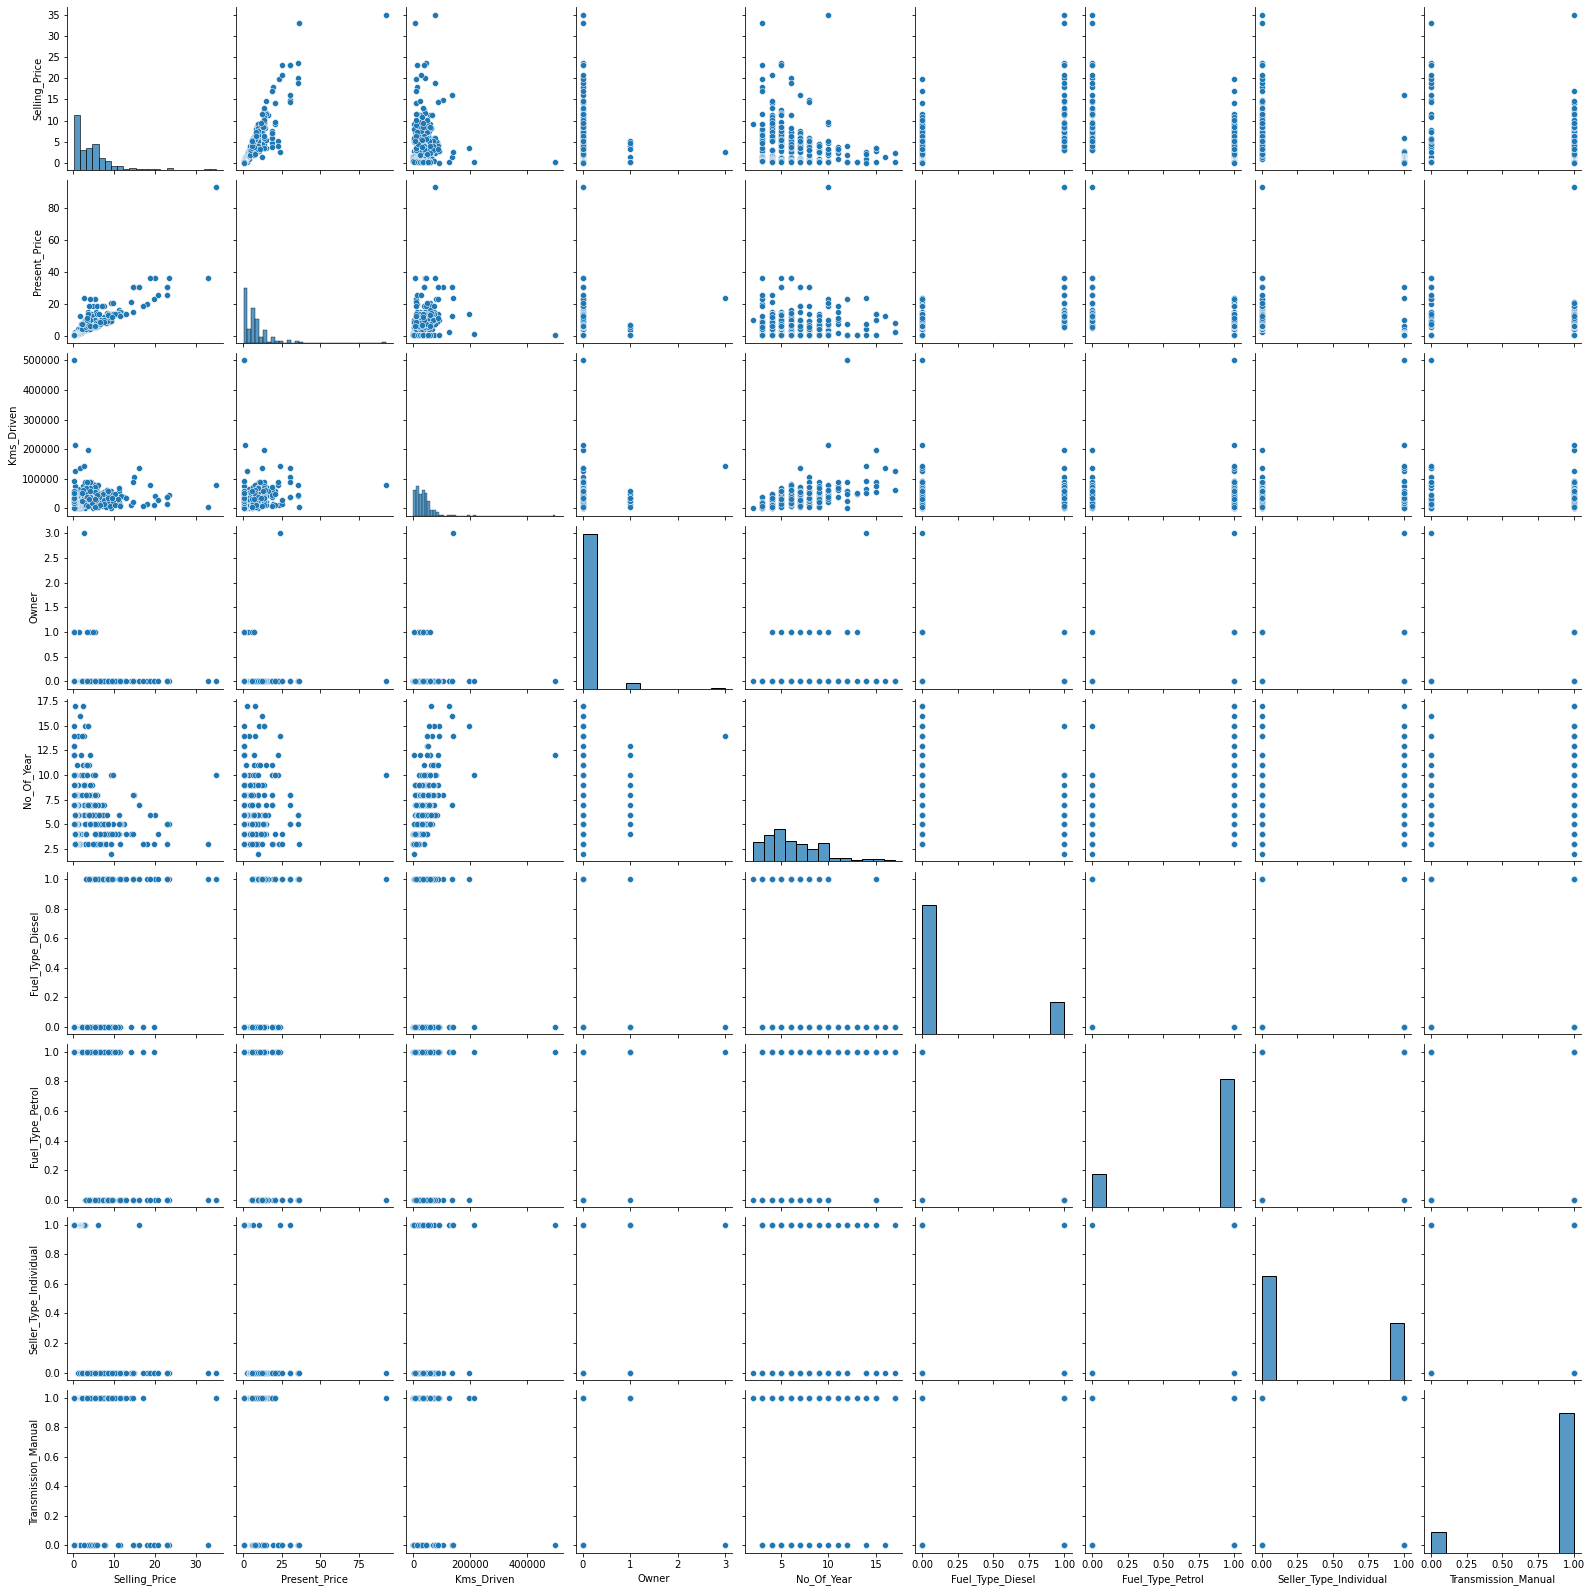

In [24]:
sns.pairplot(fdf)

In [25]:
#independent and dependent feature
X = fdf.iloc[:,1:]
y = fdf.iloc[:,0]

In [26]:
X.head()

,Present_Price,Kms_Driven,Owner,No_Of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [27]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [29]:
print(model.feature_importances_)

[0.42267083 0.0403429  0.00078219 0.07712941 0.19491753 0.01967647
 0.12252164 0.12195904]


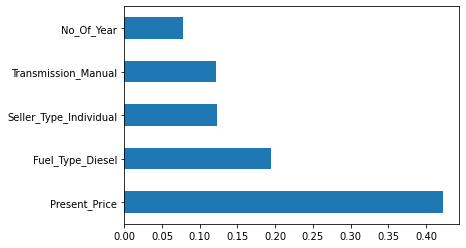

In [30]:
#plot graph of feature importance for better visualisation
feat_importances= pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [32]:
X_train.shape

(240, 8)

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [34]:
#Hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [35]:
# Randomised Search cv

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#Number of feature to consider at evry split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
# maxdepth.append(None)
# minumun number of samples required to split a node
min_samples_split = [2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [36]:
from sklearn.model_selection import RandomizedSearchCV # find out the parameters with these feature

In [37]:
# create the random grid

random_gride = {'n_estimators' : n_estimators,
                'max_features' : max_features,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf
               }
print(random_gride)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [38]:
rf = RandomForestRegressor()

In [39]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions= random_gride, scoring='neg_mean_squared_error', n_iter= 10, cv = 5, verbose = 2, random_state = 42, n_jobs=1)

In [40]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [41]:
prediction = rf_random.predict(X_test)

In [42]:
prediction

array([ 5.84840044,  3.25090596,  7.28709201,  0.53562124,  4.85264262,
        1.34521127,  5.64503282,  2.82876078,  5.78031461,  0.5792482 ,
       10.5778504 ,  4.90386801,  2.68890268,  0.2466686 ,  3.7581094 ,
        1.15058386,  9.54532732,  0.19961594,  0.84689898, 11.0681029 ,
        0.33381002,  6.93889811,  7.92319979, 11.105137  ,  3.08857502,
        4.30314726,  4.53901693, 10.5778504 ,  0.41636641,  4.42376828,
        4.84805264, 10.78385235,  5.6669072 ,  0.57962402,  3.05345519,
        3.89827824,  4.41514199,  5.80253383,  3.4914081 ,  5.25229155,
        3.27063325,  0.99961994,  2.51488778, 20.79838988,  0.72958105,
        0.26523506,  8.7025671 ,  0.42323999,  2.81266166, 13.71144924,
        5.54985645,  3.85813245,  2.70147819,  6.77533772,  4.15049295,
        2.85430127,  7.30605281,  0.41644388,  0.28102962,  0.20019197,
       11.28625622])

c:\users\aabsu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

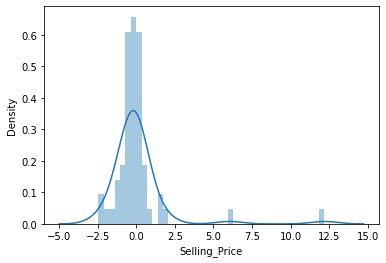

In [43]:
sns.distplot(y_test - prediction)

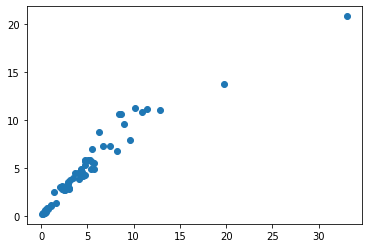

In [44]:
plt.scatter(y_test, prediction)

In [45]:
import pickle

In [46]:
# open  the file where u want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file

pickle.dump(rf_random, file)